In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Proportion of variance explained by each component:
1st component - 0.94,
2nd component - 0.06

Directions of principal components:
1st component: [-0.57532172  0.81792721] 
2nd component: [-0.81792721 -0.57532172]


/var/folders/fh/tn_fn1z16xx9hcrpz8xjxdfm0000gn/T/ipykernel_55424/71632869.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  X = np.random.multivariate_normal(mean, cov, 300)


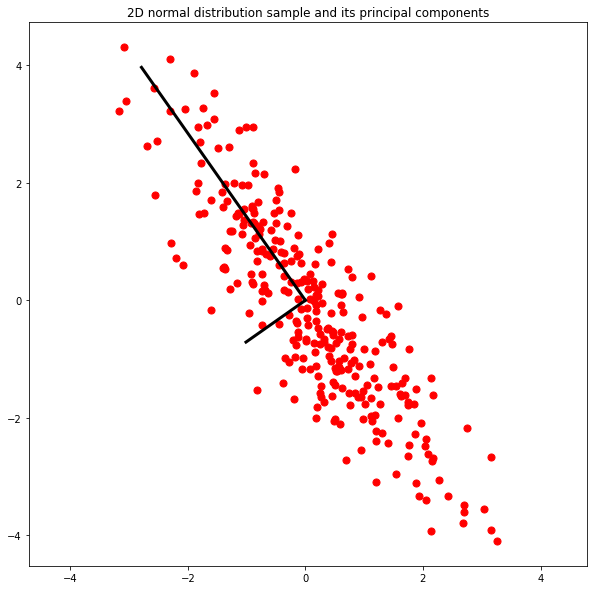

In [2]:
np.random.seed(0)
mean = np.array([0.0, 0.0])
cov = np.array([[1.0, -1.0], 
                [-2.0, 3.0]])
X = np.random.multivariate_normal(mean, cov, 300)

pca = PCA()
pca.fit(X)
print('Proportion of variance explained by each component:\n' +\
      '1st component - %.2f,\n2nd component - %.2f\n' %
      tuple(pca.explained_variance_ratio_))
print('Directions of principal components:\n' +\
      '1st component:', pca.components_[0],
      '\n2nd component:', pca.components_[1])

plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], s=50, c='r')
for l, v in zip(pca.explained_variance_ratio_, pca.components_):
    d = 5 * np.sqrt(l) * v
    plt.plot([0, d[0]], [0, d[1]], '-k', lw=3)
plt.axis('equal')
plt.title('2D normal distribution sample and its principal components')
plt.show()

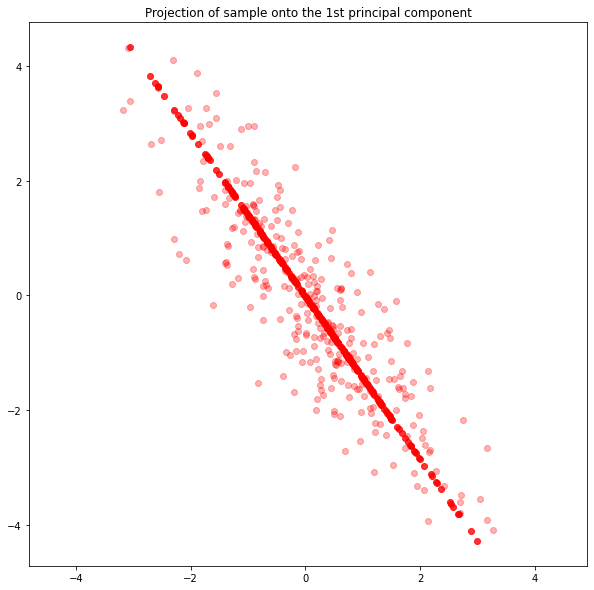

In [3]:
# Keep enough components to explain 90% of variance
pca = PCA(0.90)
X_reduced = pca.fit_transform(X)

# Map the reduced data into the initial feature space
X_new = pca.inverse_transform(X_reduced)

plt.figure(figsize=(10,10))
plt.plot(X[:, 0], X[:, 1], 'or', alpha=0.3)
plt.plot(X_new[:, 0], X_new[:, 1], 'or', alpha=0.8)
plt.axis('equal')
plt.title('Projection of sample onto the 1st principal component')
plt.show()

Meaning of the 2 components:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


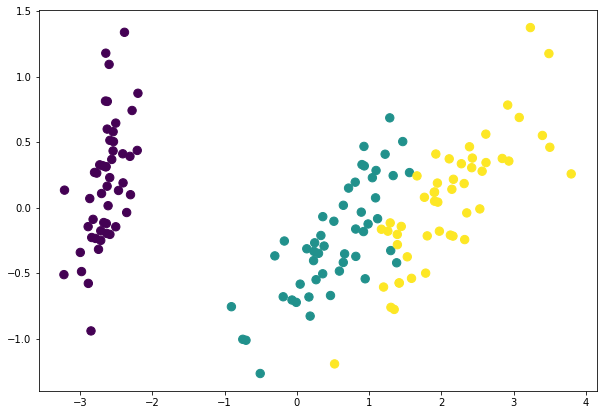

In [4]:
        from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))
plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=70, cmap='viridis')
plt.show()


Meaning of the 3 components:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)
-0.582 x sepal length (cm) + 0.598 x sepal width (cm) + 0.076 x petal length (cm) + 0.546 x petal width (cm)


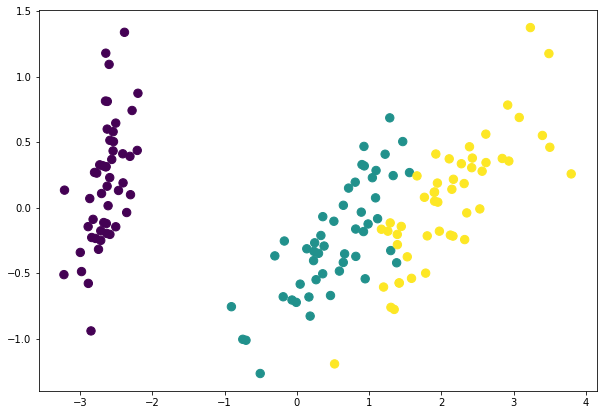

In [7]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

print("Meaning of the 3 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))
plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=70, cmap='viridis')
plt.show()


Projecting 64-dimensional data to 2D


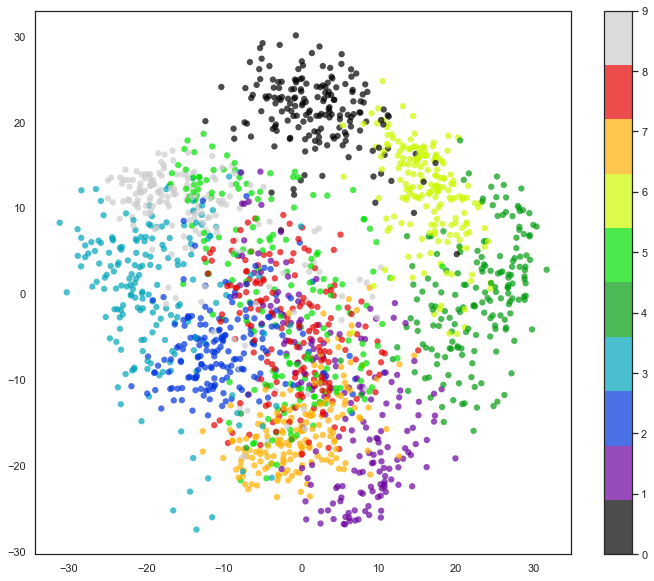

In [172]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

Projecting 64-dimensional data to 2D


/Users/aleksashka/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/aleksashka/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: user 24.9 s, sys: 4.85 s, total: 29.7 s
Wall time: 4.41 s


Text(0.5, 1.0, 'MNIST. t-SNE projection')

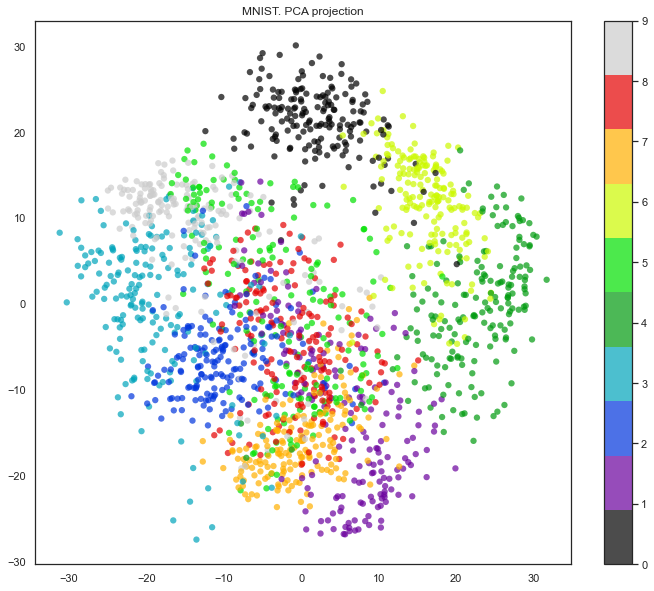

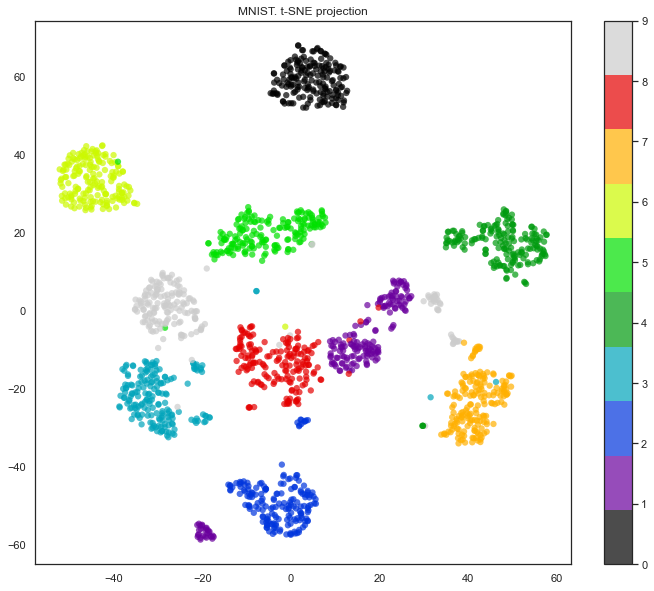

In [173]:
%%time

pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection')
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection')

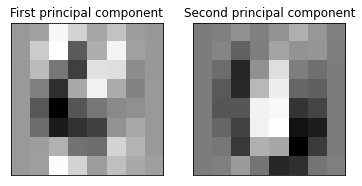

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

im = pca.components_[0]
ax1.imshow(im.reshape((8, 8)), cmap='binary')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('First principal component')

im = pca.components_[1]
ax2.imshow(im.reshape((8, 8)), cmap='binary')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Second principal component')
plt.show()

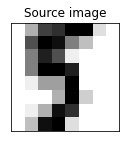

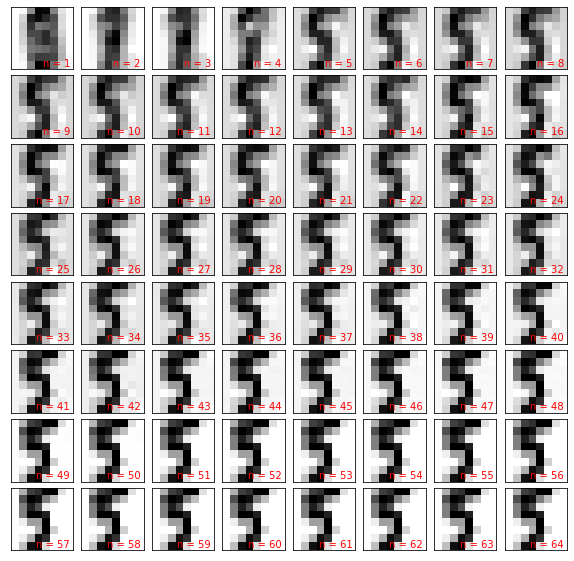

In [30]:
plt.figure(figsize=(4,2))
plt.imshow(X[15].reshape((8, 8)), cmap='binary')
plt.xticks([])
plt.yticks([])
plt.title('Source image')
plt.show()

fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[15].reshape(1, -1)))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='red')
    ax.set_xticks([])
    ax.set_yticks([])

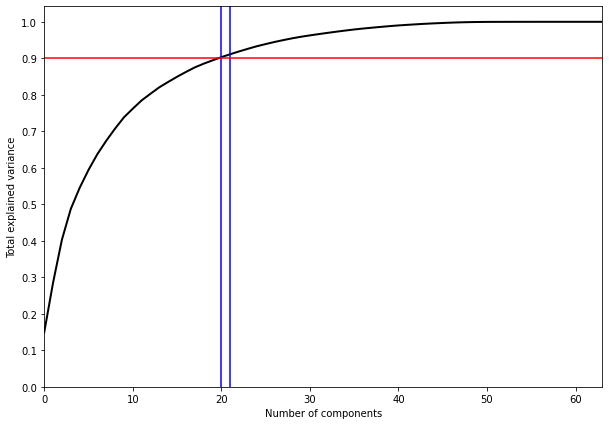

In [32]:
pca = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(20, c='b')
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show()

In [33]:
%%time
from sklearn import datasets
from sklearn.model_selection import train_test_split

lfw_people = datasets.fetch_lfw_people(min_faces_per_person=50, 
                resize=0.4, data_home='../../data/faces')

print('%d objects, %d features, %d classes' % (lfw_people.data.shape[0],
      lfw_people.data.shape[1], len(lfw_people.target_names)))
print('\nPersons:')
for name in lfw_people.target_names:
    print(name)

1560 objects, 1850 features, 12 classes

Persons:
Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Jacques Chirac
Jean Chretien
John Ashcroft
Junichiro Koizumi
Serena Williams
Tony Blair
CPU times: user 10.2 s, sys: 9.21 s, total: 19.4 s
Wall time: 9min 20s


In [34]:
for i, name in enumerate(lfw_people.target_names):
    print("{}: {} photos.".format(name, (lfw_people.target == i).sum()))

Ariel Sharon: 77 photos.
Colin Powell: 236 photos.
Donald Rumsfeld: 121 photos.
George W Bush: 530 photos.
Gerhard Schroeder: 109 photos.
Hugo Chavez: 71 photos.
Jacques Chirac: 52 photos.
Jean Chretien: 55 photos.
John Ashcroft: 53 photos.
Junichiro Koizumi: 60 photos.
Serena Williams: 52 photos.
Tony Blair: 144 photos.


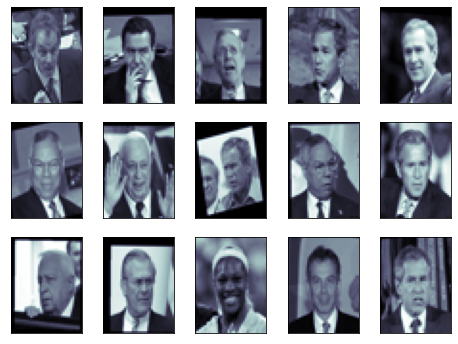

In [35]:
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap='bone')

In [36]:
X_train, X_test, y_train, y_test = \
    train_test_split(lfw_people.data, lfw_people.target, random_state=0)

print('Train size:', X_train.shape[0], 'Test size:', X_test.shape[0])

Train size: 1170 Test size: 390


100 principal components explain 90.28% of variance


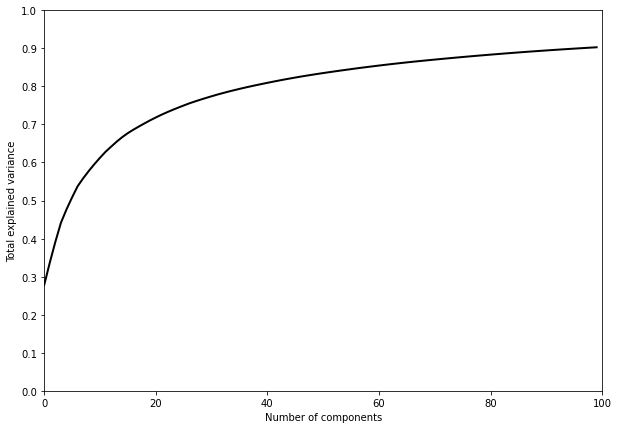

In [37]:
pca = PCA(n_components=100, svd_solver='randomized')
pca.fit(X_train)

print('100 principal components explain %.2f%% of variance' %
      (100 * np.cumsum(pca.explained_variance_ratio_)[-1]))
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), lw=2, color='k')
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 100)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

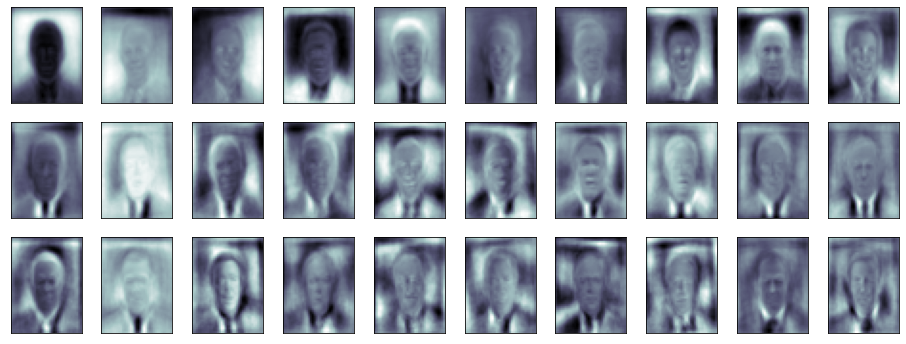

In [38]:
fig = plt.figure(figsize=(16, 6))

for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((50, 37)), cmap='bone')

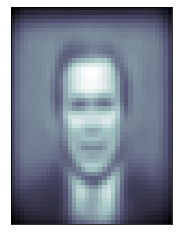

In [39]:
plt.imshow(pca.mean_.reshape((50, 37)), cmap='bone')
plt.xticks([])
plt.yticks([])
plt.show()    

In [40]:
%%time
from sklearn.svm import LinearSVC

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = LinearSVC(random_state=17).fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)


CPU times: user 1.39 s, sys: 361 ms, total: 1.75 s
Wall time: 600 ms


/Users/aleksashka/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.648718
                   precision    recall  f1-score   support

     Ariel Sharon       0.59      0.67      0.62        15
     Colin Powell       0.74      0.74      0.74        65
  Donald Rumsfeld       0.55      0.38      0.45        29
    George W Bush       0.71      0.83      0.76       133
Gerhard Schroeder       0.64      0.48      0.55        33
      Hugo Chavez       0.38      0.38      0.38        16
   Jacques Chirac       0.21      0.25      0.23        12
    Jean Chretien       0.25      0.20      0.22        10
    John Ashcroft       0.78      0.39      0.52        18
Junichiro Koizumi       0.67      0.91      0.77        11
  Serena Williams       1.00      0.58      0.73        19
       Tony Blair       0.54      0.66      0.59        29

         accuracy                           0.65       390
        macro avg       0.59      0.54      0.55       390
     weighted avg       0.65      0.65      0.64       390



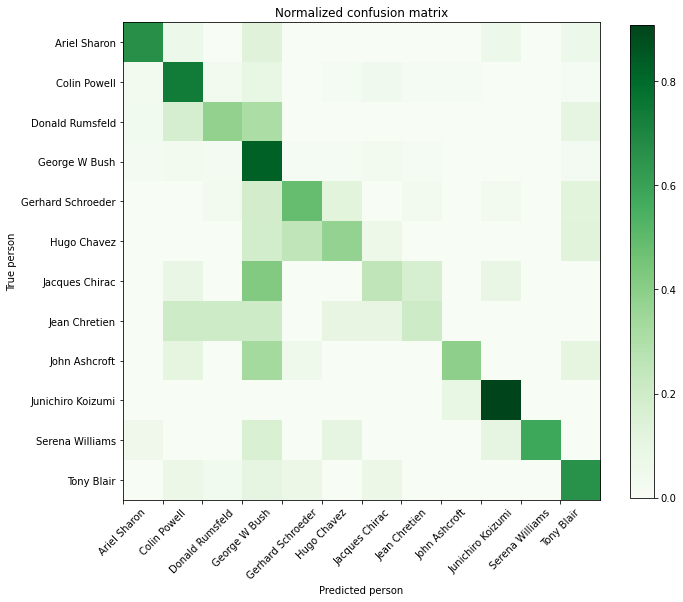

In [41]:
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix)

print("Accuracy: %f" % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))

M = confusion_matrix(y_test, y_pred)
M_normalized = M.astype('float') / M.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,10))
im = plt.imshow(M_normalized, interpolation='nearest', cmap='Greens')
plt.colorbar(im, shrink=0.71)
tick_marks = np.arange(len(lfw_people.target_names))
plt.xticks(tick_marks - 0.5, lfw_people.target_names, rotation=45)
plt.yticks(tick_marks, lfw_people.target_names)
plt.tight_layout()
plt.ylabel('True person')
plt.xlabel('Predicted person')
plt.title('Normalized confusion matrix')
plt.show()

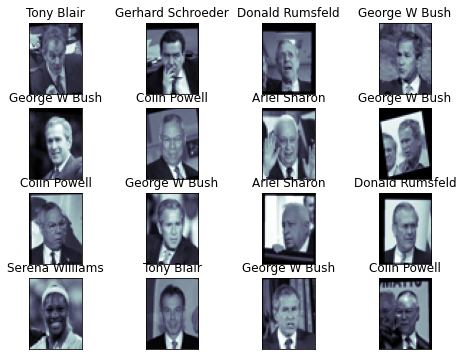

In [60]:
fig = plt.figure(figsize=(8, 6))
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap='bone',)
    ax.set_title(lfw_people.target_names[lfw_people.target[i]])



In [61]:
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

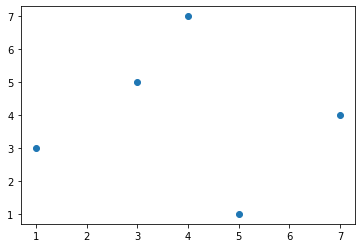

In [63]:
X = np.array([[1.0, 3.0], [3.0, 5.0], [5.0, 1.0], [7.0, 4.0], [4.0, 7.0]])
plt.scatter(X[:,0], X[:,1])

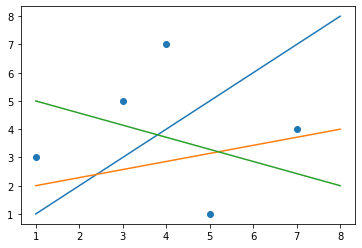

In [64]:
plt.scatter(X[:, 0], X[:, 1])
plt.plot(np.linspace(1, 8, 10), np.linspace(1, 8, 10))
plt.plot(np.linspace(1, 8, 10), np.linspace(2, 4, 10))
plt.plot(np.linspace(1, 8, 10), np.linspace(5, 2, 10));

In [65]:
from sklearn.preprocessing import StandardScaler


In [66]:
X_scaled = StandardScaler().fit_transform(X)


In [67]:
X_scaled

array([[-1.5, -0.5],
       [-0.5,  0.5],
       [ 0.5, -1.5],
       [ 1.5,  0. ],
       [ 0. ,  1.5]])

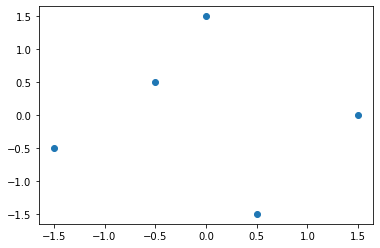

In [68]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])

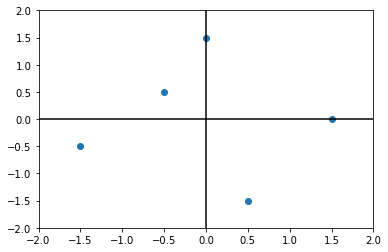

In [69]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.plot([-2, 2], [0, 0], c="black")
plt.plot([0, 0], [-2, 2], c="black")
plt.xlim(-2, 2)
plt.ylim(-2, 2);

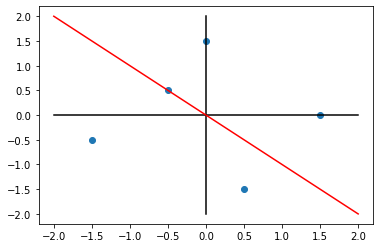

In [70]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.plot([-2, 2], [0, 0], c="black")
plt.plot([0, 0], [-2, 2], c="black")
plt.plot([-2, 2], [2, -2], c="red");

In [71]:
X_scaled.dot(np.array([1.0 / np.sqrt(2), -1.0 / np.sqrt(2)]))


array([-0.70710678, -0.70710678,  1.41421356,  1.06066017, -1.06066017])

In [72]:

X_scaled.dot(X_scaled.T)

array([[ 2.5 ,  0.5 ,  0.  , -2.25, -0.75],
       [ 0.5 ,  0.5 , -1.  , -0.75,  0.75],
       [ 0.  , -1.  ,  2.5 ,  0.75, -2.25],
       [-2.25, -0.75,  0.75,  2.25,  0.  ],
       [-0.75,  0.75, -2.25,  0.  ,  2.25]])

In [73]:

X_scaled.T.dot(X_scaled)

array([[ 5.  , -0.25],
       [-0.25,  5.  ]])

In [74]:

np.linalg.eig(X_scaled.dot(X_scaled.T))[1]

array([[-6.95492109e-01,  6.48885685e-01, -3.08606700e-01,
         4.43035932e-01,  5.57807434e-01],
       [ 1.36936270e-01,  3.22742325e-16, -3.08606700e-01,
        -7.78428475e-01,  3.55740748e-01],
       [ 2.88286884e-02,  3.24442842e-01,  6.17213400e-01,
        -2.47696742e-03,  3.05330647e-01],
       [-6.59456248e-01, -4.86664263e-01,  4.62910050e-01,
         1.84385430e-01,  5.74610801e-01],
       [-2.48647438e-01, -4.86664263e-01, -4.62910050e-01,
         4.04677835e-01,  3.72686209e-01]])

In [75]:

np.linalg.eig(X_scaled.T.dot(X_scaled))[1]

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [76]:
#singular digits
np.linalg.eig(X_scaled.T.dot(X_scaled))[0]

array([5.25, 4.75])

In [78]:
#singular digits
np.linalg.eig(X_scaled.dot(X_scaled.T))[0]

array([ 0.00000000e+00,  4.75000000e+00,  5.25000000e+00,  1.36896821e-16,
       -3.37554731e-17])

In [79]:
from scipy.linalg import svd

U, Sigma, VT = svd(X_scaled)

In [80]:
U

array([[-3.08606700e-01,  6.48885685e-01, -4.44535896e-02,
         6.43899937e-01,  2.59086902e-01],
       [-3.08606700e-01, -1.38777878e-16,  6.88974235e-01,
         1.55962443e-01, -6.36986754e-01],
       [ 6.17213400e-01,  3.24442842e-01,  6.18731418e-01,
        -1.25060538e-01,  3.39581736e-01],
       [ 4.62910050e-01, -4.86664263e-01, -2.10393173e-02,
         7.37574264e-01, -6.64359281e-02],
       [-4.62910050e-01, -4.86664263e-01,  3.74255476e-01,
         3.75852930e-02,  6.38272955e-01]])

In [81]:
Sigma

array([2.29128785, 2.17944947])

In [82]:
VT

array([[ 0.70710678, -0.70710678],
       [-0.70710678, -0.70710678]])

In [83]:
X_scaled.dot(VT.T)


array([[-7.07106781e-01,  1.41421356e+00],
       [-7.07106781e-01, -2.77555756e-16],
       [ 1.41421356e+00,  7.07106781e-01],
       [ 1.06066017e+00, -1.06066017e+00],
       [-1.06066017e+00, -1.06066017e+00]])

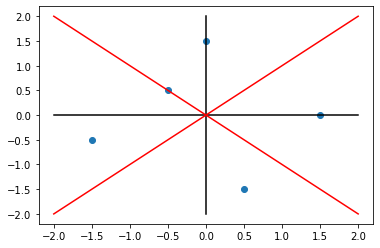

In [84]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.plot([-2, 2], [0, 0], c="black")
plt.plot([0, 0], [-2, 2], c="black")
plt.plot([-2, 2], [2, -2], c="red")
plt.plot([-2, 2], [-2, 2], c="red");

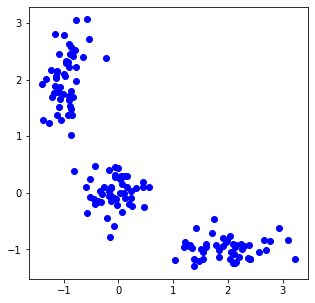

In [91]:
# Начнём с того, что насыпем на плоскость три кластера точек
X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=0.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=0.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=0.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=0.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=0.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=0.5, size=50)

plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], "bo");

In [98]:
# В scipy есть замечательная функция, которая считает расстояния
# между парами точек из двух массивов, подающихся ей на вход
from scipy.spatial.distance import cdist

# Прибьём рандомность и насыпем три случайные центроиды для начала
np.random.seed(seed=38)
centroids = np.random.normal(loc=0.0, scale=1.0, size=6)
centroids = centroids.reshape((3, 2))

cent_history = []
cent_history.append(centroids)

for i in range(3):
    # Считаем расстояния от наблюдений до центроид
    distances = cdist(X, centroids)
    # Смотрим, до какой центроиде каждой точке ближе всего
    labels = distances.argmin(axis=1)

    # Положим в каждую новую центроиду геометрический центр её точек
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)

    cent_history.append(centroids)

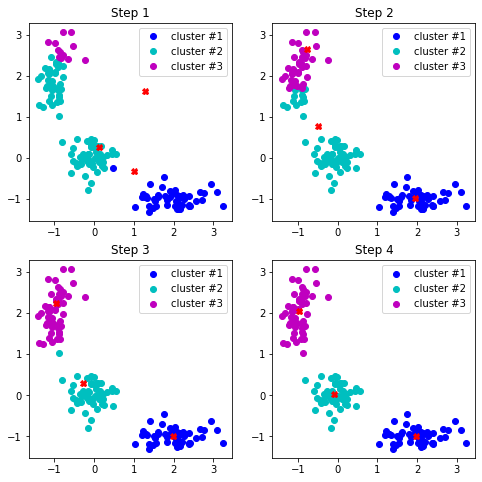

In [99]:
# А теперь нарисуем всю эту красоту
plt.figure(figsize=(8, 8))
for i in range(4):
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)

    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], "bo", label="cluster #1")
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], "co", label="cluster #2")
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], "mo", label="cluster #3")
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], "rX")
    plt.legend(loc=0)
    plt.title("Step {:}".format(i + 1));

In [100]:
from sklearn.cluster import KMeans

In [101]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

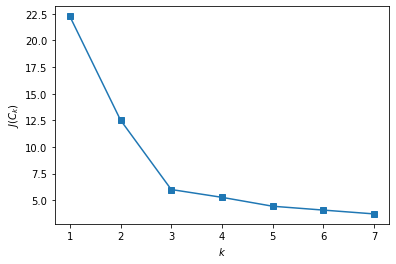

In [102]:
plt.plot(range(1, 8), inertia, marker="s")
plt.xlabel("$k$")
plt.ylabel("$J(C_k)$");

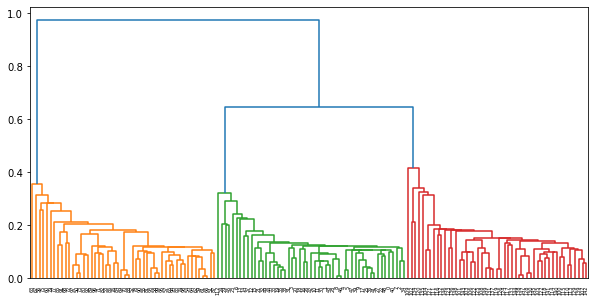

In [103]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=0.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=0.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=0.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=0.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=0.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=0.5, size=50)

distance_mat = pdist(
    X
)  # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(
    distance_mat, "single"
)  # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

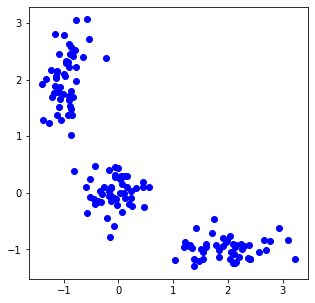

In [104]:
plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], "bo");

In [105]:
import pandas as pd
from sklearn import datasets, metrics
from sklearn.cluster import (
    AffinityPropagation,
    AgglomerativeClustering,
    KMeans,
    SpectralClustering,
)

data = datasets.load_digits()
X, y = data.data, data.target

algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(
    SpectralClustering(n_clusters=10, random_state=1, affinity="nearest_neighbors")
)
algorithms.append(AgglomerativeClustering(n_clusters=10))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(
        (
            {
                "ARI": metrics.adjusted_rand_score(y, algo.labels_),
                "AMI": metrics.adjusted_mutual_info_score(y, algo.labels_),
                "Homogenity": metrics.homogeneity_score(y, algo.labels_),
                "Completeness": metrics.completeness_score(y, algo.labels_),
                "V-measure": metrics.v_measure_score(y, algo.labels_),
                "Silhouette": metrics.silhouette_score(X, algo.labels_),
            }
        )
    )

results = pd.DataFrame(
    data=data,
    columns=["ARI", "AMI", "Homogenity", "Completeness", "V-measure", "Silhouette"],
    index=["K-means", "Affinity", "Spectral", "Agglomerative"],
)

results


,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.662295,0.736567,0.735448,0.742972,0.739191,0.182097
Affinity,0.174871,0.612364,0.958899,0.486801,0.645767,0.115161
Spectral,0.756461,0.852040,0.831691,0.876614,0.853562,0.182729
Agglomerative,0.794003,0.866832,0.857513,0.879096,0.868170,0.178497


In [107]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"
nba = pd.read_csv(DATA_PATH +"nba_2013.csv")
nba.head(3)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013


In [118]:
nba[(nba.pts == nba.pts.max())| (nba.ast == nba.ast.max())]

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
133,Kevin Durant,SF,25,OKC,81,81,3122,849,1688,0.503,...,540,598,445,103,59,285,174,2593,2013-2014,2013
451,John Wall,PG,23,WAS,82,82,2980,579,1337,0.433,...,295,333,721,149,40,295,219,1583,2013-2014,2013


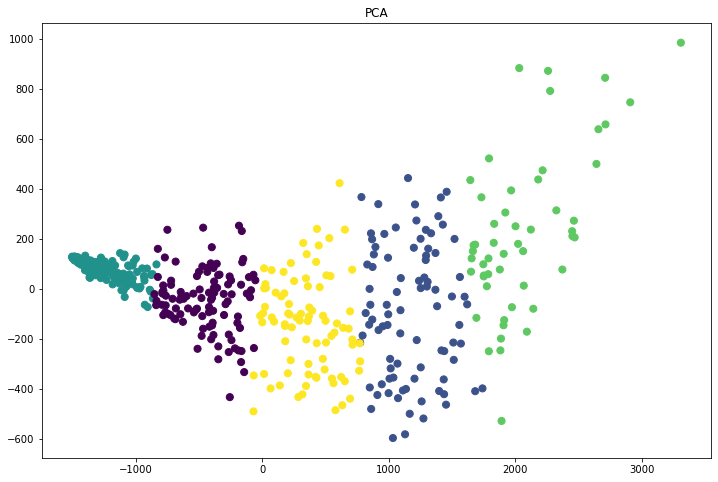

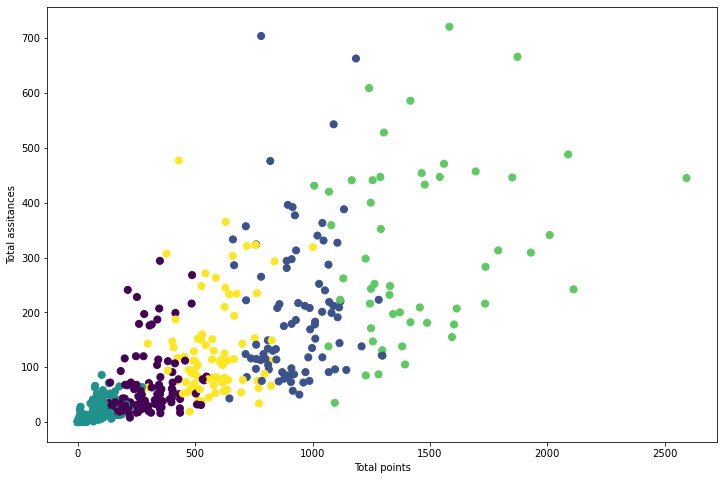

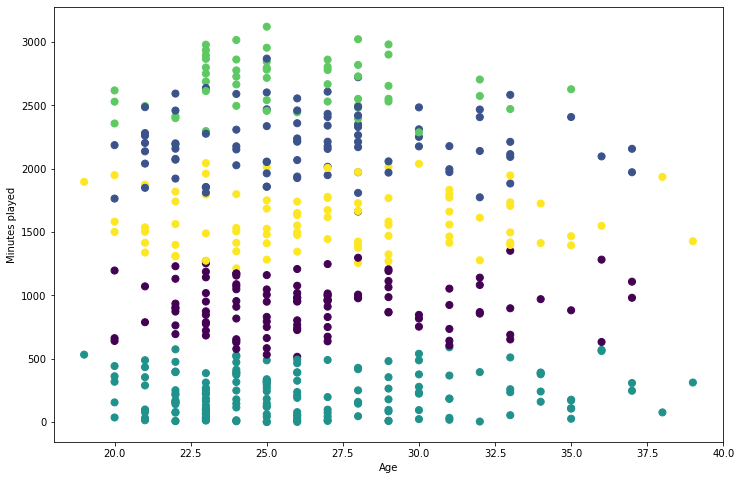

In [121]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=5, random_state=1)
numeric_cols = nba._get_numeric_data().dropna(axis=1)
kmeans.fit(numeric_cols)


# Visualizing using PCA
pca = PCA(n_components=2)
res = pca.fit_transform(numeric_cols)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.title('PCA')

# Visualizing using 2 features: Total points vs. Total assists
plt.figure(figsize=(12,8))
plt.scatter(nba['pts'], nba['ast'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('Total points')
plt.ylabel('Total assitances')

# Visualizing using 2 features: Age vs. Minutes played
plt.figure(figsize=(12,8))
plt.scatter(nba['age'], nba['mp'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Minutes played');


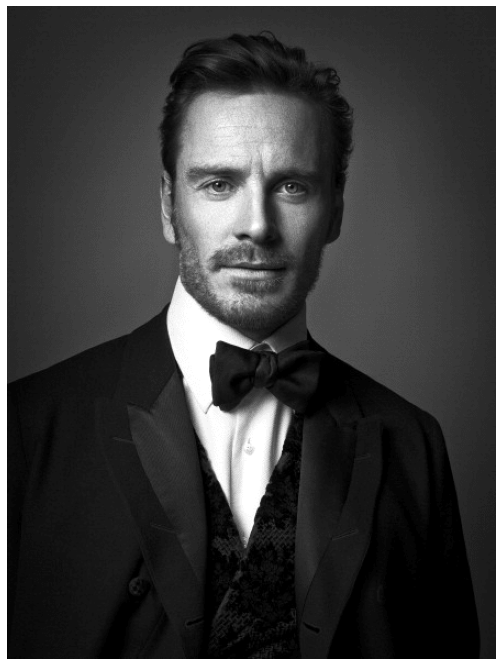

In [133]:
import matplotlib.image as mpimg

img = mpimg.imread('man.png')[..., 1]
plt.figure(figsize = (20, 12))
plt.axis('off')
plt.imshow(img, cmap='gray');

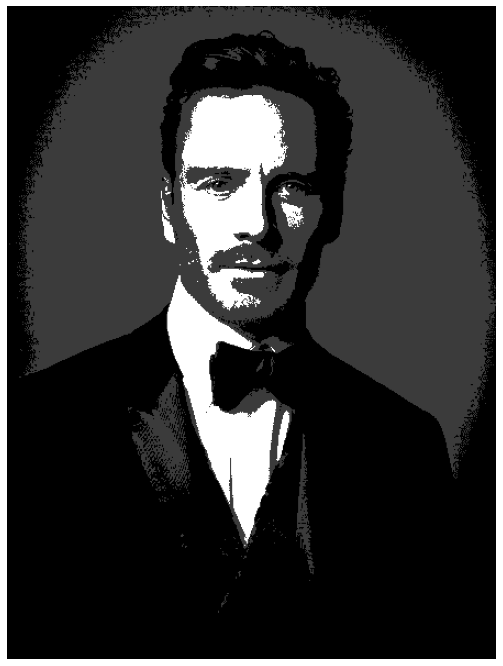

In [134]:
from scipy.stats import randint
from sklearn.cluster import MiniBatchKMeans

X = img.reshape((-1, 1))
k_means = MiniBatchKMeans(n_clusters=3)
k_means.fit(X) 
values = k_means.cluster_centers_
labels = k_means.labels_
img_compressed = values[labels].reshape(img.shape)
plt.figure(figsize = (20, 12))
plt.axis('off')
plt.imshow(img_compressed, cmap = 'gray');

In [135]:
from time import time

from sklearn import metrics
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.preprocessing import Normalizer

categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space']

print("Loading 20 newsgroups dataset for categories:")
print(categories)

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

labels = dataset.target
true_k = np.unique(labels).shape[0]

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
3387 documents
4 categories


In [136]:
print("Extracting features from the training dataset using a sparse vectorizer")
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english')

X = vectorizer.fit_transform(dataset.data)
print("n_samples: %d, n_features: %d" % X.shape)

Extracting features from the training dataset using a sparse vectorizer
n_samples: 3387, n_features: 1000


In [140]:
dataset.data[0],dataset.target_names[0]

('From: healta@saturn.wwc.edu (Tammy R Healy)\nSubject: Re: who are we to judge, Bobby?\nLines: 38\nOrganization: Walla Walla College\nLines: 38\n\nIn article <1993Apr14.213356.22176@ultb.isc.rit.edu> snm6394@ultb.isc.rit.edu (S.N. Mozumder ) writes:\n>From: snm6394@ultb.isc.rit.edu (S.N. Mozumder )\n>Subject: Re: who are we to judge, Bobby?\n>Date: Wed, 14 Apr 1993 21:33:56 GMT\n>In article <healta.56.734556346@saturn.wwc.edu> healta@saturn.wwc.edu (TAMMY R HEALY) writes:\n>>Bobby,\n>>\n>>I would like to take the liberty to quote from a Christian writer named \n>>Ellen G. White.  I hope that what she said will help you to edit your \n>>remarks in this group in the future.\n>>\n>>"Do not set yourself as a standard.  Do not make your opinions, your views \n>>of duty, your interpretations of scripture, a criterion for others and in \n>>your heart condemn them if they do not come up to your ideal."\n>>                         Thoughts Fromthe Mount of Blessing p. 124\n>>\n>>I hope quoting

In [141]:
print("Extracting features from the training dataset using a sparse vectorizer")
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english')

X = vectorizer.fit_transform(dataset.data)
print("n_samples: %d, n_features: %d" % X.shape)

Extracting features from the training dataset using a sparse vectorizer
n_samples: 3387, n_features: 1000


In [148]:
print(X)

  (0, 266)	0.09257190271659897
  (0, 824)	0.10236504109444217
  (0, 676)	0.112172917852521
  (0, 961)	0.12376976720648043
  (0, 220)	0.11941170705436456
  (0, 912)	0.09020137388058583
  (0, 317)	0.11110439285365865
  (0, 284)	0.05826542318415168
  (0, 604)	0.12490509377996681
  (0, 682)	0.12433151690615415
  (0, 100)	0.10908540302673299
  (0, 159)	0.12037619344485845
  (0, 982)	0.06843475414832859
  (0, 777)	0.09982607960323521
  (0, 122)	0.163643816508636
  (0, 965)	0.06989560154406659
  (0, 650)	0.1314226423578799
  (0, 672)	0.15515938927538753
  (0, 126)	0.0840572850361928
  (0, 889)	0.06296770275121602
  (0, 102)	0.3008753956625971
  (0, 282)	0.08579400349744988
  (0, 894)	0.12163189473912746
  (0, 193)	0.09127638629350456
  (0, 955)	0.2486630338123083
  :	:
  (3386, 651)	0.06074694280669303
  (3386, 19)	0.09571501187363211
  (3386, 884)	0.07653116858137184
  (3386, 596)	0.07218470252455506
  (3386, 516)	0.16064914793820043
  (3386, 437)	0.19763667948323477
  (3386, 208)	0.15043567

In [149]:
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

order_centroids = km.cluster_centers_.argsort()[:, ::-1]

Clustering sparse data with KMeans(max_iter=100, n_clusters=4, n_init=1)
Homogeneity: 0.525
Completeness: 0.593
V-measure: 0.557
Adjusted Rand-Index: 0.521
Silhouette Coefficient: 0.018


In [150]:
order_centroids

array([[371, 192, 651, ..., 368, 352, 999],
       [380, 926, 192, ..., 514, 801, 999],
       [830, 588,  46, ..., 822, 585, 311],
       [471, 802, 514, ..., 467, 468,   0]])

In [151]:
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % (i + 1), end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 1: god com people article don sandvik jesus say just christian
Cluster 2: graphics university com thanks image posting ac host nntp computer
Cluster 3: space nasa access henry digex gov pat toronto alaska shuttle
Cluster 4: keith sgi livesey caltech jon solntze wpd com schneider cco


/Users/aleksashka/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [152]:
from sklearn.datasets import load_digits

digits = load_digits()

X, y = digits.data, digits.target

In [153]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

KMeans(n_clusters=10)

In [154]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(y, kmeans.predict(X))

0.6668014656797994

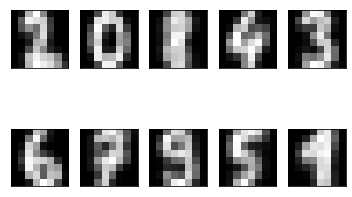

In [155]:
_, axes = plt.subplots(2, 5)
for ax, center in zip(axes.ravel(), kmeans.cluster_centers_):
    ax.matshow(center.reshape(8, 8), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())

/var/folders/fh/tn_fn1z16xx9hcrpz8xjxdfm0000gn/T/ipykernel_55424/3331425015.py:17: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
/var/folders/fh/tn_fn1z16xx9hcrpz8xjxdfm0000gn/T/ipykernel_55424/3331425015.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_clr = np.choose(y, [1, 2, 0]).astype(np.

[Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, ''),
 Text(5.0, 0, ''),
 Text(6.0, 0, ''),
 Text(7.0, 0, ''),
 Text(8.0, 0, '')]

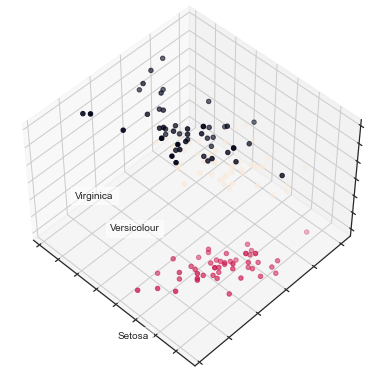

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

# Загрузим наши ириски
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Заведём красивую трёхмерную картинку
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Поменяем порядок цветов меток, чтобы они соответствовали правильному
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

In [158]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Выделим из наших данных валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

# Для примера возьмём неглубокое дерево решений
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))

Accuracy: 0.88889


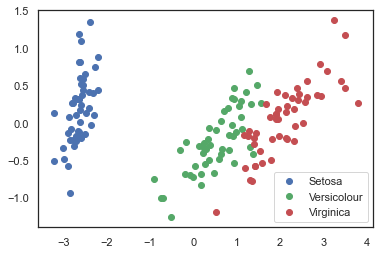

In [166]:
# Using PCA from sklearn PCA
pca = decomposition.PCA(n_components=4)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

# Plotting the results of PCA
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], "bo", label="Setosa")
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], "go", label="Versicolour")
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], "ro", label="Virginica")
plt.legend(loc=0);

In [167]:
# Test-train split and apply PCA
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, stratify=y, random_state=42
)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print("Accuracy: {:.5f}".format(accuracy_score(y_test, preds.argmax(axis=1))))

Accuracy: 0.91111


In [168]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

1 component: 92.46% of initial variance
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
2 component: 5.31% of initial variance
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)
3 component: 1.71% of initial variance
-0.582 x sepal length (cm) + 0.598 x sepal width (cm) + 0.076 x petal length (cm) + 0.546 x petal width (cm)
4 component: 0.52% of initial variance
-0.315 x sepal length (cm) + 0.320 x sepal width (cm) + 0.480 x petal length (cm) + -0.754 x petal width (cm)
